### Setting paths and imports

In [1]:
import sys
import os
import pandas as pd

module_path = os.path.abspath(os.path.join('..'))
sys.path.append(module_path)
module_path

'/NFSHOME/mprado/AIIM/GRETEL/main2/GRETEL'

In [2]:
os.chdir(module_path)

In [3]:
# from src.evaluation.evaluator_manager import EvaluatorManager
# from src.evaluation.future.evaluator_manager_do import EvaluatorManager as PairedEvaluatorManager
from src.utils.context import Context
from src.data_analysis.future.data_analyzer import DataAnalyzer as data_analyzer

from src.evaluation.future.evaluator_manager_triplets import EvaluatorManager

In [4]:
config_f_name = 'ensembles/triplets/TCR-TCO/E10-TCR-128-28-0.25_TCO_Ensemble-Bidirectional.jsonc'

### Evaluating the explainer

In [5]:
config_path = os.path.join(module_path, 'lab', 'config', config_f_name)
runno = 1
    
print(f"Generating context for: {config_path}")
context = Context.get_context(config_path)
context.run_number = runno

context.logger.info(f"Executing: {context.config_file} Run: {context.run_number}")
context.logger.info("Creating the evaluation manager....................................")

context.logger.info("Creating the evaluators......................................................")
eval_manager = EvaluatorManager(context)

context.logger.info(
    "Evaluating the explainers............................................................."
)
eval_manager.evaluate()

Generating context for: /NFSHOME/mprado/AIIM/GRETEL/main2/GRETEL/lab/config/ensembles/triplets/TCR-TCO/E10-TCR-128-28-0.25_TCO_Ensemble-Bidirectional.jsonc
2024-07-24 17:23:27,-447278221 | INFO | 435484 - Executing: /NFSHOME/mprado/AIIM/GRETEL/main2/GRETEL/lab/config/ensembles/triplets/TCR-TCO/E10-TCR-128-28-0.25_TCO_Ensemble-Bidirectional.jsonc Run: 1
2024-07-24 17:23:27,-447278206 | INFO | 435484 - Creating the evaluation manager....................................
2024-07-24 17:23:27,-447278193 | INFO | 435484 - Creating the evaluators......................................................
2024-07-24 17:23:28,-447277293 | INFO | 435484 - Loading: TreeCyclesRand-266bb3721206805597afc8c4184fe0ab
2024-07-24 17:23:28,-447276797 | INFO | 435484 - Created: TreeCyclesRand-266bb3721206805597afc8c4184fe0ab
2024-07-24 17:23:29,-447276263 | INFO | 435484 - Creating: TreeCyclesOracle-8f8e216deff127e0218ff13e1490c1a2
2024-07-24 17:23:29,-447276245 | INFO | 435484 - TreeCyclesOracle trained in: 5.

/NFSHOME/mprado/AIIM/GRETEL/main2/GRETEL/src/explainer/generative/gans/graph/res_gen.py:64: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3571.)
  edge_weights = torch.add(edge_weights, rebuild_adj_matrix(len(node_features), edge_list, edge_attr.T, self.device))


2024-07-24 17:23:39,-447266516 | INFO | 435484 - The counterfactual for 0 was reduced
2024-07-24 17:23:39,-447266456 | INFO | 435484 - The counterfactual for 0 was reduced
2024-07-24 17:23:39,-447265862 | INFO | 435484 - The counterfactual for 9 was reduced
2024-07-24 17:23:39,-447265837 | INFO | 435484 - evaluated instance with id 0
2024-07-24 17:23:39,-447265836 | INFO | 435484 - Evaluating instance with id 1
2024-07-24 17:23:40,-447265353 | INFO | 435484 - The counterfactual for 1 was reduced
2024-07-24 17:23:41,-447264639 | INFO | 435484 - The counterfactual for 25 was reduced
2024-07-24 17:23:41,-447264568 | INFO | 435484 - evaluated instance with id 1
2024-07-24 17:23:41,-447264566 | INFO | 435484 - Evaluating instance with id 2
2024-07-24 17:23:41,-447264095 | INFO | 435484 - The counterfactual for 2 was reduced
2024-07-24 17:23:42,-447263428 | INFO | 435484 - The counterfactual for 50 was reduced
2024-07-24 17:23:42,-447263349 | INFO | 435484 - evaluated instance with id 2
2024

### Aggregating the stats

In [6]:
results_path = os.path.join(module_path, 'lab', 'output', 'results')
stats_file_path = os.path.join(module_path, 'lab', 'stats', 'results.csv')
res = data_analyzer.create_aggregated_dataframe(results_path)
res.to_csv(stats_file_path)
res

,scope,dataset,oracle,explainer,Runtime,Runtime-std,GraphEditDistance,GraphEditDistance-std,Correctness,Correctness-std,OracleCalls,OracleCalls-std,OracleAccuracy,OracleAccuracy-std,Sparsity,Sparsity-std,Fidelity,Fidelity-std,Instability,Instability-std
0,ensembles,TreeCyclesRand-266bb3721206805597afc8c4184fe0ab,TreeCyclesOracle-8f8e216deff127e0218ff13e1490c1a2,ExplanationBidirectionalSearch,7.195638,0.0,1.199219,0.0,1.0,0.0,846.78125,0.0,1.0,0.0,0.028557,0.0,1.0,0.0,1.016657,0.0


### Visualizing individual instances

In [8]:
evaluator = eval_manager.evaluators[0]
evaluator

In [9]:
exp = evaluator.explanations[2]
og_inst = exp.input_instance
cf_inst = exp.counterfactual_instances[0]

In [10]:

changes = data_analyzer.get_cf_changes(og_inst, cf_inst, False)

In [11]:
common_edges = changes['common edges']
added_edges = changes['added edges']
removed_edges = changes['removed edges']
common_nodes = changes['common nodes']
added_nodes = changes['added nodes']
removed_nodes = changes['removed nodes']

print(f'added edges: {added_edges}')
print(f'removed_edges: {removed_edges}')
print(f'added nodes: {added_nodes}')
print(f'removed nodes: {removed_nodes}')

added edges: [(4, 10)]
removed_edges: []
added nodes: []
removed nodes: []


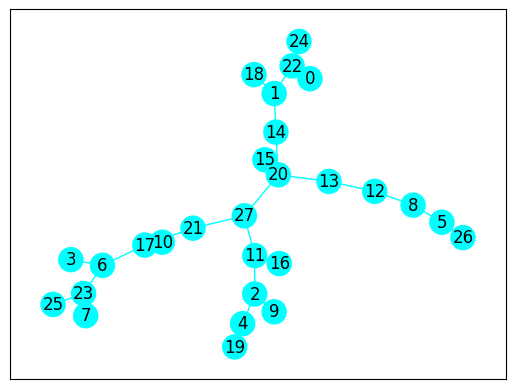

In [14]:
pos = data_analyzer.draw_graph(og_inst)

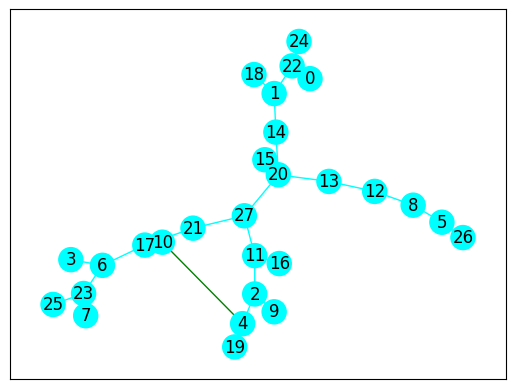

In [15]:
data_analyzer.draw_counterfactual_actions(og_inst, cf_inst, position=pos)